In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
import pydotplus
from xgboost import XGBClassifier
import pickle

In [2]:
heart_data=pd.read_csv("C:/Users/91738/Desktop/framingham.csv")

In [3]:
heart_data.head(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

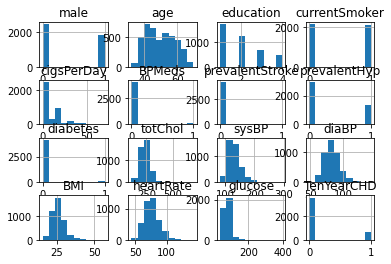

In [4]:
heart_data.hist()

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

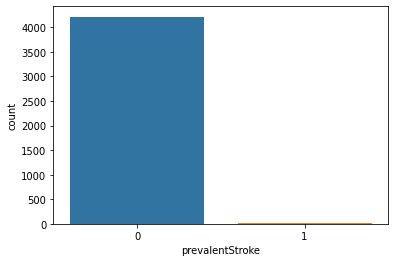

In [5]:
sns.countplot(x="prevalentStroke",data=heart_data)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

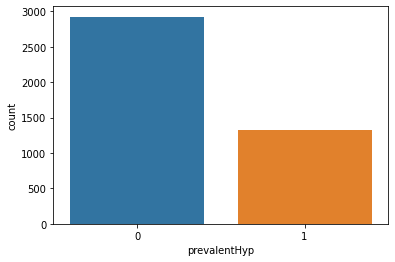

In [6]:
sns.countplot(x="prevalentHyp",data=heart_data)

<AxesSubplot:ylabel='Frequency'>

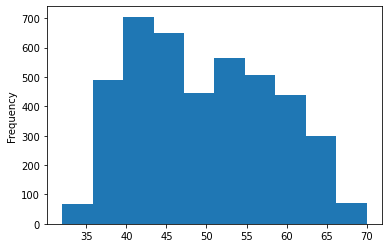

In [7]:
heart_data["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

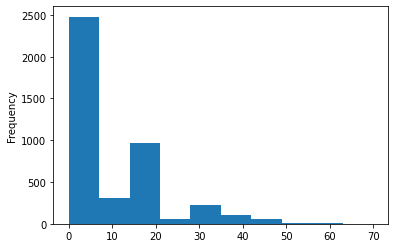

In [8]:
heart_data["cigsPerDay"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

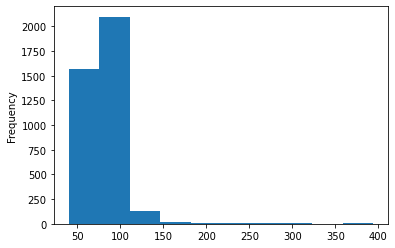

In [9]:
heart_data["glucose"].plot.hist()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

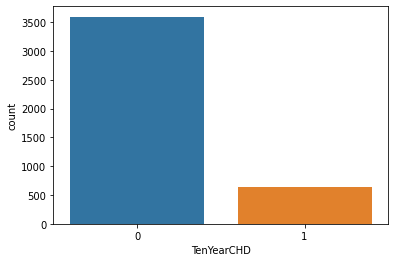

In [10]:
sns.countplot(x="TenYearCHD",data=heart_data)

In [11]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
df = pd.read_csv("C:/Users/91738/Desktop/framingham.csv")
df['TenYearCHD'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])
#Initialize ChiSquare Class
cT = ChiSquare(df)
#Feature Selection
testColumns = ['currentSmoker','BPMeds','education']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="TenYearCHD" )

currentSmoker is NOT an important predictor. (Discard currentSmoker from model)
BPMeds is NOT an important predictor. (Discard BPMeds from model)
education is NOT an important predictor. (Discard education from model)


In [12]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

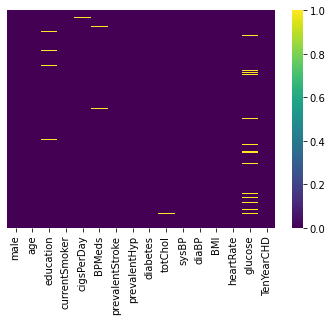

In [13]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [14]:
heart_data.drop("education",axis=1,inplace=True)

In [15]:
heart_data.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [16]:
m=np.mean(heart_data["glucose"])
print(m)

81.96365524402907


In [17]:
heart_data["glucose"].replace(to_replace=np.nan,value=m,inplace=True)
heart_data["BMI"].replace(to_replace=np.nan,value=25,inplace=True)
heart_data["cigsPerDay"].replace(to_replace=np.nan,value=5,inplace=True)
heart_data["heartRate"].replace(to_replace=np.nan,value=90,inplace=True)
heart_data.drop("currentSmoker",axis=1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

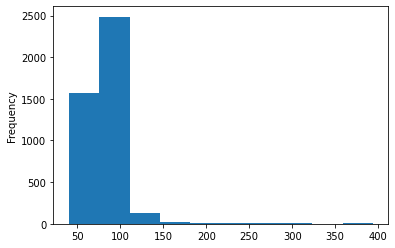

In [18]:
heart_data["glucose"].plot.hist()

In [19]:
heart_data.head(10)

male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0     1   39         0.0     0.0                0             0         0   
1     0   46         0.0     0.0                0             0         0   
2     1   48        20.0     0.0                0             0         0   
3     0   61        30.0     0.0                0             1         0   
4     0   46        23.0     0.0                0             0         0   
5     0   43         0.0     0.0                0             1         0   
6     0   63         0.0     0.0                0             0         0   
7     0   45        20.0     0.0                0             0         0   
8     1   52         0.0     0.0                0             1         0   
9     1   43        30.0     0.0                0             1         0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1    250.0  121.0   81.0  28.73       95.0     76.0           0  
2    245.0  127.5   80.0  25.34       75.0     70.0           0  
3    225.0  150.0   95.0  28.58       65.0    103.0           1  
4    285.0  130.0   84.0  23.10       85.0     85.0           0  
5    228.0  180.0  110.0  30.30       77.0     99.0           0  
6    205.0  138.0   71.0  33.11       60.0     85.0           1  
7    313.0  100.0   71.0  21.68       79.0     78.0           0  
8    260.0  141.5   89.0  26.36       76.0     79.0           0  
9    225.0  162.0  107.0  23.61       93.0     88.0           0

<AxesSubplot:>

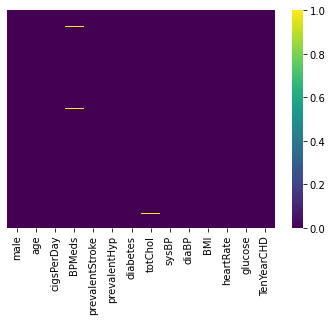

In [20]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [21]:
heart_data["totChol"].replace(to_replace=np.nan,value=247.0,inplace=True)
heart_data.drop("BPMeds",axis=1,inplace=True)

<AxesSubplot:>

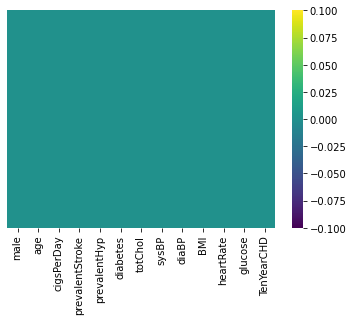

In [22]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [23]:
heart_data.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

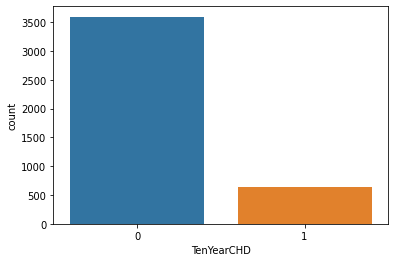

In [24]:
sns.countplot(x="TenYearCHD",data=heart_data)

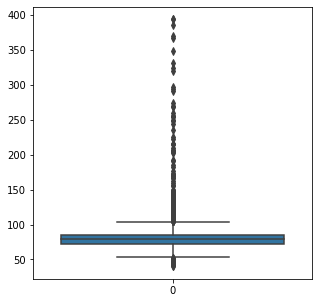

In [25]:
plt.figure(figsize=(5,5))
ax=sns.boxplot(data=heart_data["glucose"])

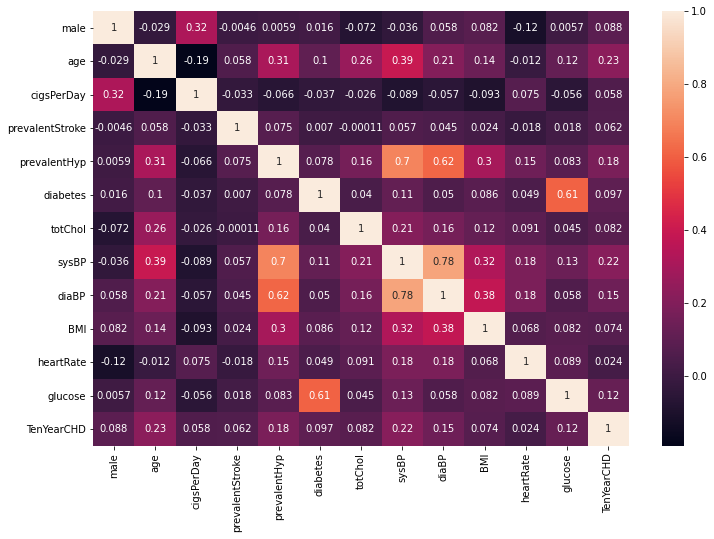

In [26]:
plt.figure(figsize=(12,8))
plot=sns.heatmap(heart_data.corr(), annot=True)

In [27]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#Logistic Regression Algorithm

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

C:\Users\91738\anaconda3\envs\ten\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
print('Accuracy Score : '+str(accuracy_score(y_test,y_pred)))
print('Precision Score : '+str(precision_score(y_test,y_pred)))
print('Recall Score : '+str(recall_score(y_test,y_pred)))
print('F1 Score : '+str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix :\n '+str(confusion_matrix(y_test,y_pred)))


Accuracy Score : 0.8655660377358491
Precision Score : 0.7272727272727273
Recall Score : 0.06722689075630252
F1 Score : 0.12307692307692307
Confusion Matrix :
 [[726   3]
 [111   8]]


In [30]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

<AxesSubplot:>

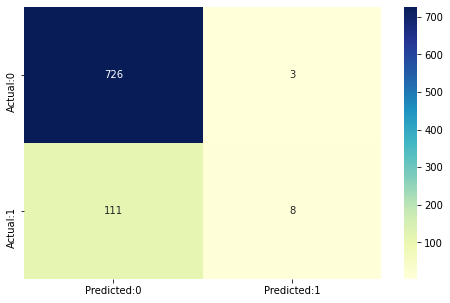

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")

In [32]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [33]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8655660377358491 
 The Missclassification = 1-Accuracy =  0.13443396226415094 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.06722689075630252 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9958847736625515 
 Positive Predictive value = TP/(TP+FP) =  0.7272727272727273 
 Negative predictive Value = TN/(TN+FN) =  0.8673835125448028 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  16.336134453781586 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9366275435794152


In [34]:
#K Nearest Neighbors Algorithm

from sklearn.neighbors import KNeighborsClassifier

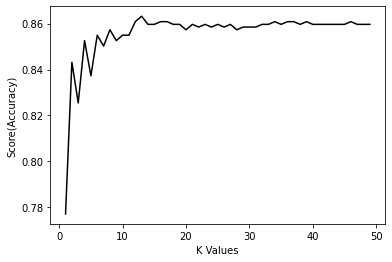

In [35]:
scores = []
for each in range(1,50):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(X_train,y_train)
    scores.append(KNNfind.score(X_test,y_test))
    
plt.plot(range(1,50),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [36]:
KNNfind = KNeighborsClassifier(n_neighbors = 24) #n_neighbors = K value
KNNfind.fit(X_train,y_train) #learning model
prediction = KNNfind.predict(X_test)
ytrue = y_test

In [37]:
from sklearn.metrics import confusion_matrix
print('Accuracy score using KNN :\n '+str(accuracy_score(ytrue,prediction)))
print('Precision Score : '+str(precision_score(ytrue,prediction)))
print('Recall Score : '+str(recall_score(ytrue,prediction)))
print('F1 Score : '+str(f1_score(ytrue,prediction)))
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,prediction)))


Accuracy score using KNN :
 0.8584905660377359
Precision Score : 0.42857142857142855
Recall Score : 0.025210084033613446
F1 Score : 0.047619047619047616
Confusion Matrix :
 [[725   4]
 [116   3]]


In [38]:
 fn=list(X_train.columns)
cn=heart_data["TenYearCHD"].unique()
cnames=[]
for x in cn:
    x=str(x)
    cnames.append(x)
    
print('feature names are:',fn)
print('class labels are:',cnames)

feature names are: ['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
class labels are: ['0', '1']


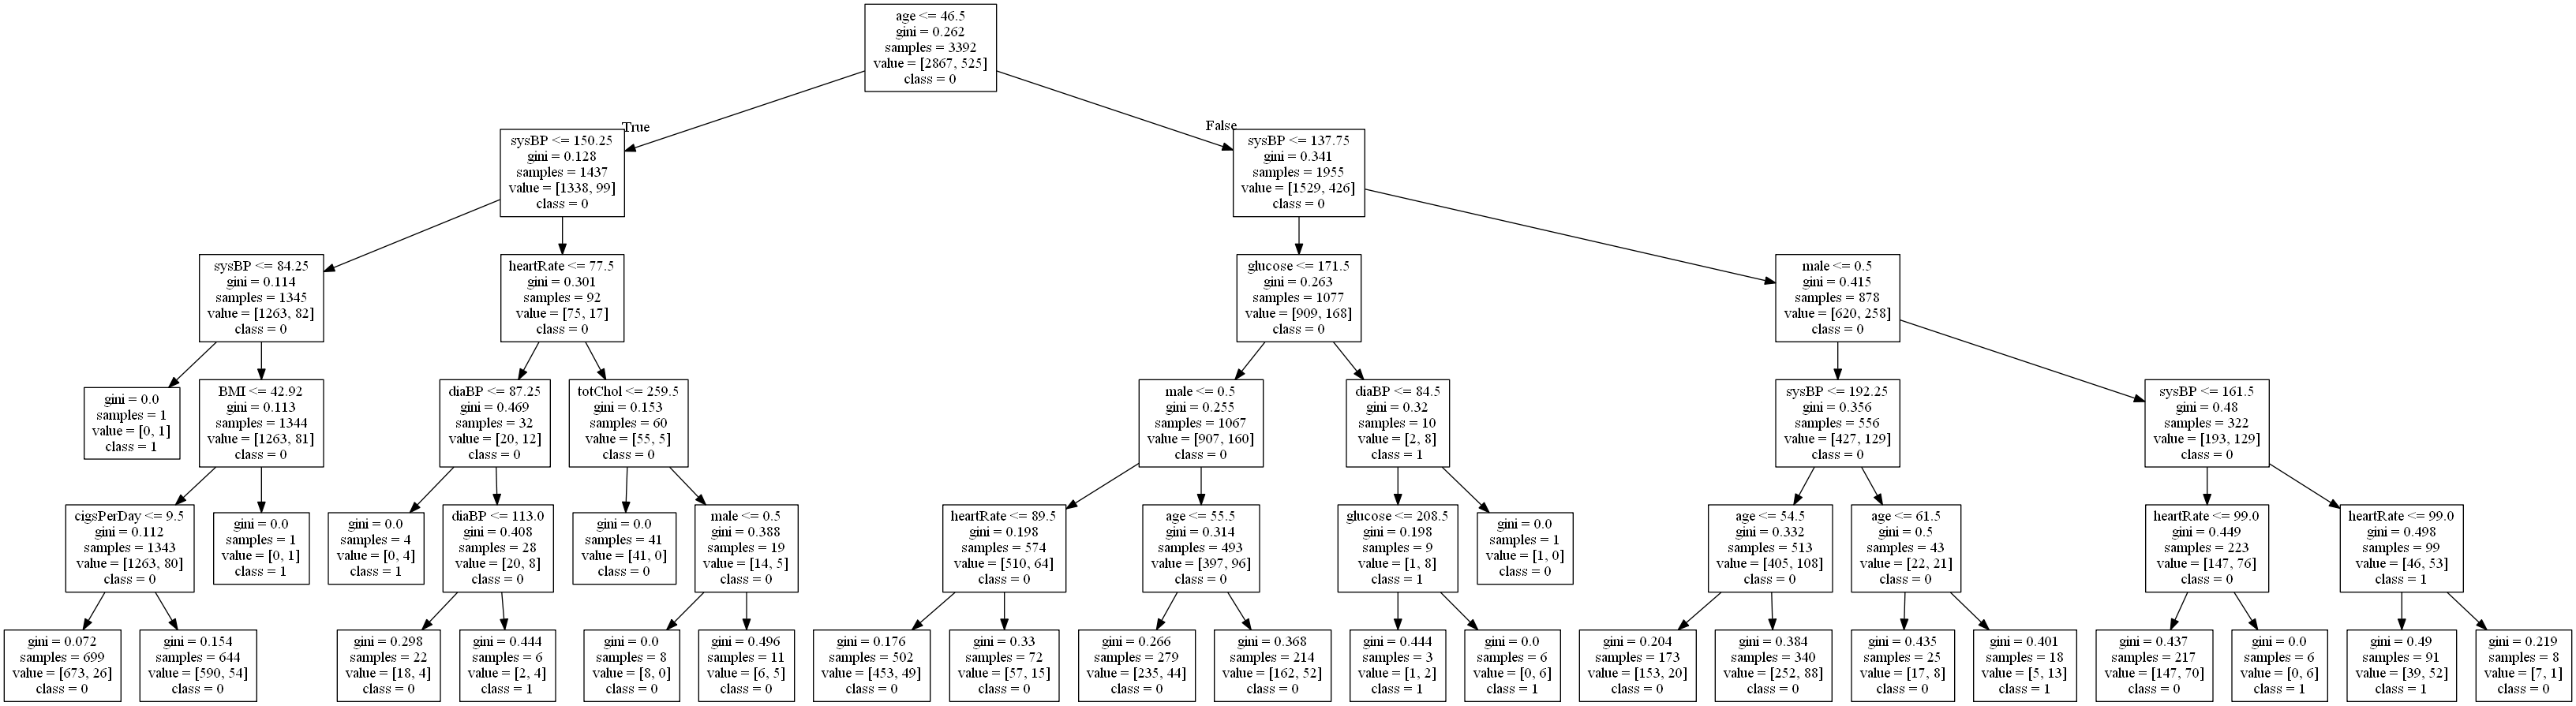

In [39]:
#Decision tree ALgorithm

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=5)
model=DTC.fit(X_train,y_train) #learning
#prediciton
dot_data=tree.export_graphviz(model,out_file=None,feature_names=fn,class_names=cnames)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [40]:
#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=5)
model=DTC.fit(X_train,y_train) #learning
#prediciton
dot_data=tree.export_graphviz(model,out_file=None,feature_names=fn,class_names=cnames)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [41]:
print("Decision Tree Score: ",DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)
print('Precision Score : '+str(precision_score(y_test,y_pred)))
print('Recall Score : '+str(recall_score(y_test,y_pred)))
print('F1 Score : '+str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,prediction)))



Decision Tree Score:  0.7747641509433962
Precision Score : 0.7272727272727273
Recall Score : 0.06722689075630252
F1 Score : 0.12307692307692307
Confusion Matrix :
 [[725   4]
 [116   3]]


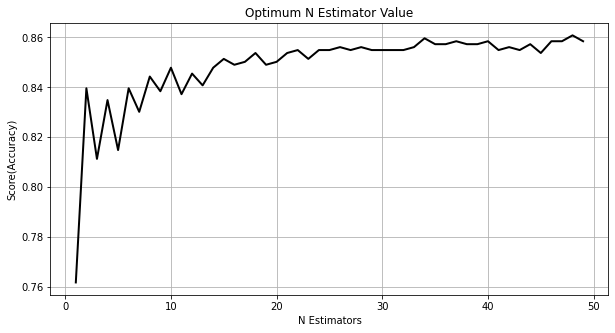

In [42]:
#Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=15)
    RFfind.fit(X_train,y_train)
    scores.append(RFfind.score(X_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()


In [43]:
RFfind= RandomForestClassifier(n_estimators = 100, random_state=15) #n_estimator = DT
RFfind.fit(X_train,y_train) # learning
print("Random Forest Score: ",RFfind.score(X_test,y_test))
RFCscore=RFfind.score(X_test,y_test)

Random Forest Score:  0.8608490566037735


In [44]:
yprediciton2= RFfind.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
print('Accuracy score using KNN :\n '+str(accuracy_score(ytrue,yprediciton2)))
print('Precision Score : '+str(precision_score(ytrue,yprediciton2)))
print('Recall Score : '+str(recall_score(ytrue,yprediciton2)))
print('F1 Score : '+str(f1_score(ytrue,yprediciton2)))
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,yprediciton2)))



Accuracy score using KNN :
 0.8608490566037735
Precision Score : 0.5238095238095238
Recall Score : 0.09243697478991597
F1 Score : 0.15714285714285717
Confusion Matrix :
 [[719  10]
 [108  11]]


In [45]:
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,yprediciton2)))


Confusion Matrix :
 [[719  10]
 [108  11]]


In [46]:
## Pickle
from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(clf, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of Logistic Regression model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Logistic Regression model = ',accuracy_score(y_test, y_pred))

Confusion matrix of Logistic Regression model: 
 [[726   3]
 [111   8]] 

Accuracy of Logistic Regression model =  0.8655660377358491


In [47]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
names=["Logistic_Regression","KNearest_Neighbors","Decision_Tree","Random_Forest","Naive_Bayes"]
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

In [48]:
scores=[]
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    scores.append(score)

C:\Users\91738\anaconda3\envs\ten\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
scores

[0.8655660377358491,
 0.8372641509433962,
 0.7676886792452831,
 0.8584905660377359,
 0.839622641509434]

In [50]:
df=pd.DataFrame()
df['name']=names
df['score']=scores
df

name     score
0  Logistic_Regression  0.865566
1   KNearest_Neighbors  0.837264
2        Decision_Tree  0.767689
3        Random_Forest  0.858491
4          Naive_Bayes  0.839623

In [51]:
cm=sns.light_palette("green",as_cmap=True)
s=df.style.background_gradient(cmap=cm)
s

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic_Regression'),
  Text(1, 0, 'KNearest_Neighbors'),
  Text(2, 0, 'Decision_Tree'),
  Text(3, 0, 'Random_Forest'),
  Text(4, 0, 'Naive_Bayes')])

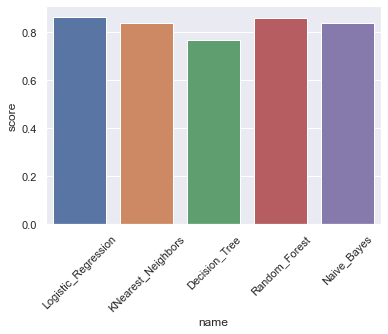

In [52]:
sns.set(style="darkgrid")
ax=sns.barplot(x="name",y="score",data=df)
plt.xticks(rotation=45)

In [53]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Note: you may need to restart the kernel to use updated packages.
